# [Lighthouse] Desafio Ciência de Dados 2025-11



# Importação das Bibliotecas

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



# Importação e leitura do banco de dados

In [160]:

# Leitura do arquivo csv
df = pd.read_csv("../Dataset/desafio_indicium_imdb.csv")
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# Análise Exploratória dos Dados

## Atributos

```python
Series_Title – Nome do filme
Released_Year - Ano de lançamento
Certificate - Classificação etária
Runtime – Tempo de duração
Genre - Gênero
IMDB_Rating - Nota do IMDB
Overview - Overview do filme
Meta_score - Média ponderada de todas as críticas 
Director – Diretor
Star1 - Ator/atriz #1
Star2 - Ator/atriz #2
Star3 - Ator/atriz #3
Star4 - Ator/atriz #4
No_of_Votes - Número de votos
Gross - Faturamento
```


## Informações sobre os atributos do dataset

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


## Contagem de linhas duplicadas

In [162]:
df.duplicated().sum() 

np.int64(0)

## Verificação de valores nulos

In [163]:
df.isnull().sum()


Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## Números de linhas e colunas totais (Contando com o índice)

In [164]:
df.shape

(999, 16)

# Tratamento de dados

## Exclusão dos valores nulos e outros valores

In [165]:
# Remoção da coluna "Unnamed: 0" Referente ao índice do Dataset
df.drop(columns="Unnamed: 0", inplace=True)

In [166]:
# Exclusão dos valores nulos
df.dropna(inplace=True)

In [167]:
#Número de linhas e colunas restantes após exclusão dos valores nulos
df.shape

(713, 15)

## Ajustes

In [168]:

#Converção de ano de lançamento para numérico
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64')

#Removendo 'min' de Runtime e converter para float
df['Runtime'] = df['Runtime'].astype(str).str.replace(" min", "", regex=False).astype(float)

#Remover vírgulas de Gross e converter para numérico
df['Gross'] = df['Gross'].astype(str).str.replace(",", "", regex=False).astype(float).astype('Int64')

In [169]:

# Conferir novamente após ajustes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 996
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   713 non-null    object 
 1   Released_Year  712 non-null    Int64  
 2   Certificate    713 non-null    object 
 3   Runtime        713 non-null    float64
 4   Genre          713 non-null    object 
 5   IMDB_Rating    713 non-null    float64
 6   Overview       713 non-null    object 
 7   Meta_score     713 non-null    float64
 8   Director       713 non-null    object 
 9   Star1          713 non-null    object 
 10  Star2          713 non-null    object 
 11  Star3          713 non-null    object 
 12  Star4          713 non-null    object 
 13  No_of_Votes    713 non-null    int64  
 14  Gross          713 non-null    Int64  
dtypes: Int64(2), float64(3), int64(1), object(9)
memory usage: 90.5+ KB


In [170]:
#Separar o gênero principal(primeiro da lista) quando há multiplos gêneros
df['Main_Genre'] = df['Genre'].str.split(', ').str[0]
df['Main_Genre']


0          Crime
1         Action
2          Crime
3          Crime
4         Action
         ...    
989        Drama
990    Adventure
991    Animation
993       Comedy
996        Drama
Name: Main_Genre, Length: 713, dtype: object

## Visualização do dataset pós-tratamento

In [171]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Main_Genre
0,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,Crime
1,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,Action
2,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,Crime
3,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,Crime
4,The Lord of the Rings: The Return of the King,2003,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Giù la testa,1971,PG,157.0,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690,Drama
990,Kelly's Heroes,1970,GP,144.0,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435,Adventure
991,The Jungle Book,1967,U,78.0,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612,Animation
993,A Hard Day's Night,1964,U,87.0,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024,Comedy


# Descrição estatística das colunas quantitativas

In [172]:
colunas_quantitativas = df.select_dtypes(include=['float64', 'int64']).columns
descricao_estatistica = df[colunas_quantitativas].describe()
descricao_estatistica.to_excel('../Resultados/descricao_estatistica.xlsx', index=True)
descricao_estatistica
#Salvando a descrição estatística do dataset em um arquivo Excel

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,712.0,713.000000,713.000000,713.000000,7.130000e+02,713.0
mean,1995.738764,123.690042,7.935203,77.154278,3.533480e+05,78583952.863955
std,18.611182,25.896632,0.288999,12.409392,3.462212e+05,115043278.676214
min,1930.0,72.000000,7.600000,28.000000,2.522900e+04,1305.0
25%,1986.75,104.000000,7.700000,70.000000,9.582600e+04,6153939.0
50%,2001.0,120.000000,7.900000,78.000000,2.363110e+05,35000000.0
75%,2010.0,136.000000,8.100000,86.000000,5.059180e+05,102515793.0
max,2019.0,238.000000,9.200000,100.000000,2.303232e+06,936662225.0


# Frequência de colunas qualitativas

## Coluna Certificate (Classificação Etária) com percentual de frequência

In [173]:
frequencia_certificate = pd.DataFrame({'Frequency': df['Certificate'].value_counts(), 'Percentage': (df['Certificate'].value_counts(normalize=True) * 100) .map('{:.2f}%'.format)})
frequencia_certificate.to_excel('../Resultados/frequencia_certificate.xlsx', index=True)
frequencia_certificate
#Exibe a frequencia das classificações etárias com porcentagem

,Frequency,Percentage
Certificate,,
U,183,25.67%
A,173,24.26%
UA,142,19.92%
R,131,18.37%
PG-13,38,5.33%
PG,19,2.66%
G,9,1.26%
Passed,9,1.26%
Approved,6,0.84%


## Coluna Genre

In [174]:
frequencia_genre = pd.DataFrame({'Frequency': df['Main_Genre'].value_counts(), 'Percentage': (df['Main_Genre'].value_counts(normalize=True) * 100) .map('{:.2f}%'.format)})
frequencia_genre.to_excel('../Resultados/frequencia_genere_with_percentage.xlsx', index=True)
frequencia_genre
#Exibe a frequencia dos gêneros com porcentagem

,Frequency,Percentage
Main_Genre,,
Drama,191,26.79%
Action,127,17.81%
Comedy,104,14.59%
Crime,74,10.38%
Biography,73,10.24%
Animation,63,8.84%
Adventure,58,8.13%
Horror,9,1.26%
Mystery,7,0.98%


## Coluna Director


In [175]:
frequencia_director = pd.DataFrame({'Frequency': df['Director'].value_counts(), 'Percentage': (df['Director'].value_counts(normalize=True) * 100) .map('{:.2f}%'.format)})
frequencia_director.to_excel('../Resultados/frequencia_director.xlsx', index=True)
frequencia_director.iloc[:15]
#Exibe a frequencia dos 15 diretores com mais filmes no dataset

,Frequency,Percentage
Director,,
Steven Spielberg,13,1.82%
Martin Scorsese,10,1.40%
Alfred Hitchcock,9,1.26%
David Fincher,8,1.12%
Clint Eastwood,8,1.12%
Christopher Nolan,8,1.12%
Quentin Tarantino,8,1.12%
Woody Allen,7,0.98%
Rob Reiner,7,0.98%


## Colunas 'Star1', 'Star2', 'Star3' e 'Star4'

In [ ]:
df_stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
df_stars
#Exibe os atores/atrizes em uma única coluna, vale lembrar que Star1 é o ator/atriz principal, Star2 o coadjuvante, e assim por diante.

0         Marlon Brando
1        Christian Bale
2             Al Pacino
3           Henry Fonda
4           Elijah Wood
             ...       
989         Maria Monti
990    Carroll O'Connor
991    Bruce Reitherman
993         Ringo Starr
996          Donna Reed
Length: 2852, dtype: object

## Frequência Stars

In [ ]:
frequencia_stars = pd.DataFrame({'Frequency': df_stars.value_counts(), 'Percentage': (df_stars.value_counts(normalize=True) * 100) .map('{:.2f}%'.format)})
frequencia_stars.to_excel('../Resultados/frequencia_stars.xlsx', index=True)
frequencia_stars.iloc[:15]
#Exibe a frequencia dos 15 atores/atrizes principáis com mais filmes no dataset

,Frequency,Percentage
Robert De Niro,16,0.56%
Tom Hanks,14,0.49%
Al Pacino,13,0.46%
Brad Pitt,12,0.42%
Leonardo DiCaprio,11,0.39%
Clint Eastwood,11,0.39%
Matt Damon,11,0.39%
Christian Bale,11,0.39%
Denzel Washington,9,0.32%
Scarlett Johansson,9,0.32%


# Plotagem de Dados

## 1. Histograma das colunas quantitativas


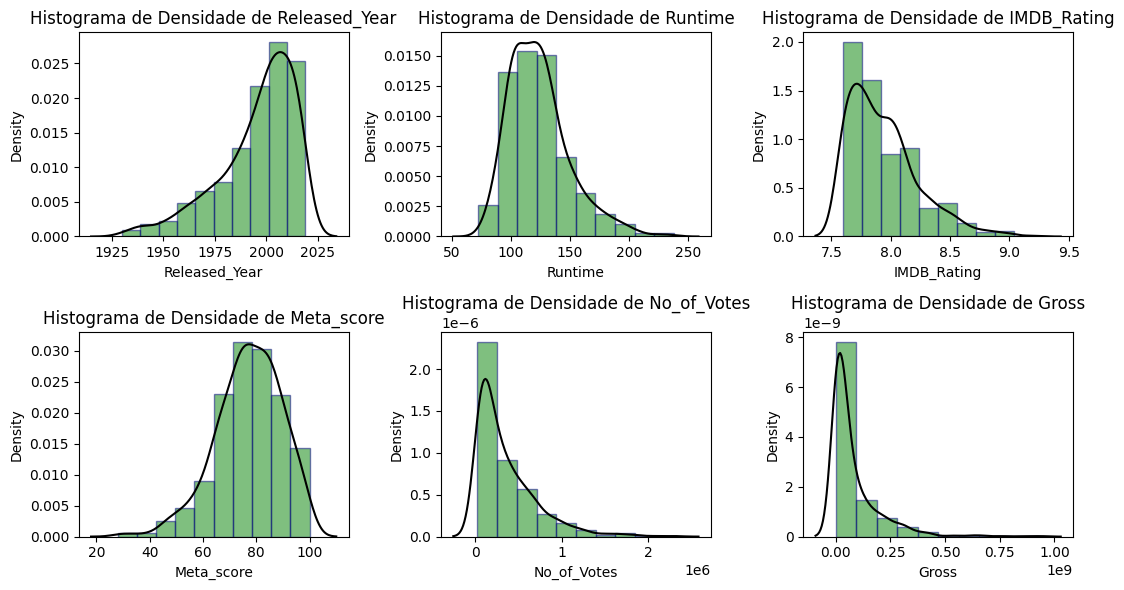

In [200]:
# Plotando histogramas para fazer a visualização grafica da distribuição de densidade de cada coluna quantitativa do dataset
plt.figure(figsize=(11,6))
for n, column in enumerate(colunas_quantitativas, start=1):
    plt.subplot(2,3,n)
    plt.hist(data = df, x = column, color='green', histtype='bar', rwidth=2, edgecolor='navy', density=True, alpha=.5)
    sns.kdeplot(df[column], color='black')
    plt.title(f'Histograma de Densidade de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.savefig('../resultados/Histogramas.png')
plt.show()

## 2. Boxplot dos atributo quantitativo

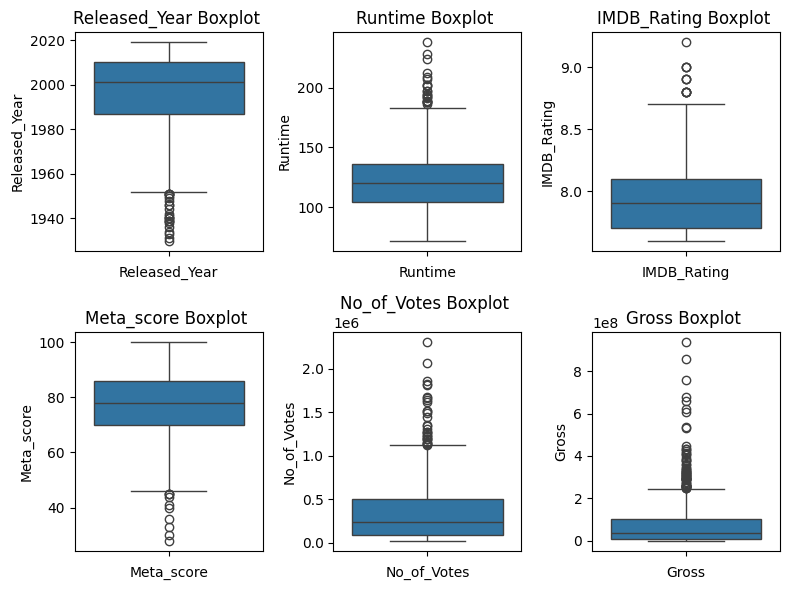

In [ ]:
# Vizualização da distribuição dos percentis e outliers de cada atributo quantitativo
plt.figure(figsize=(8,6))
for n, column in enumerate(colunas_quantitativas, start=1):
    plt.subplot(2,3,n)
    sns.boxplot(df[column])
    plt.title(f'{column} Boxplot ')
    plt.xlabel(column)
plt.tight_layout()
plt.savefig('../resultados/Boxplots.png')
plt.show()

## Hipótese


#### A hipótese é que:
 - A maioria dos filmes tem uma duração entre 90 e 150 minutos, com uma mediana em torno de 120 minutos.
 - A maioria dos filmes tem uma classificação IMDB entre 6 e 8, com uma mediana em torno de 7. 
 - A maioria dos filmes tem entre 10.000 e 100.000 votos no IMDB, com uma mediana em torno de 50.000 votos.
 - A maioria dos filmes tem uma receita bruta (Gross) entre 10 milhões e 100 milhões de dólares, com uma mediana em torno de 50 milhões de dólares.

#### Essa visualização ajuda a identificar a mediana, os quartis e possíveis outliers em cada atributo quantitativo do dataset.
Onde há outliers, podemos optar por removê-los ou mantê-los dependendo do contexto da análise. Essa decisão pode impactar na performance dos modelos preditivos.

É possível observar outliers em:
- Runtime
- IMDB_Rating
- IMDB_Votes
- Gross
    
Os outliers em Gross podem ser mantidos, pois indicam filmes de grande sucesso financeiro, o que é relevante para a análise.

Já os outliers em Runtime e IMDB_Rating podem ser avaliados caso a caso para decidir se devem ser removidos ou mantidos.

Já os quartis ajudam a entender a dispersão dos dados. 
- O Q1 (25º percentil) indica que 25% dos filmes têm valores abaixo desse ponto.
- Enquanto o Q3 (75º percentil) mostra que 75% dos filmes estão abaixo desse valor.
- A diferença entre Q3 e Q1, conhecida como intervalo interquartil (IQR), pode ser útil para identificar a variabilidade dos dados.

## 3. Gráficos de dispersão entre variáveis quantitativas (Scatter)

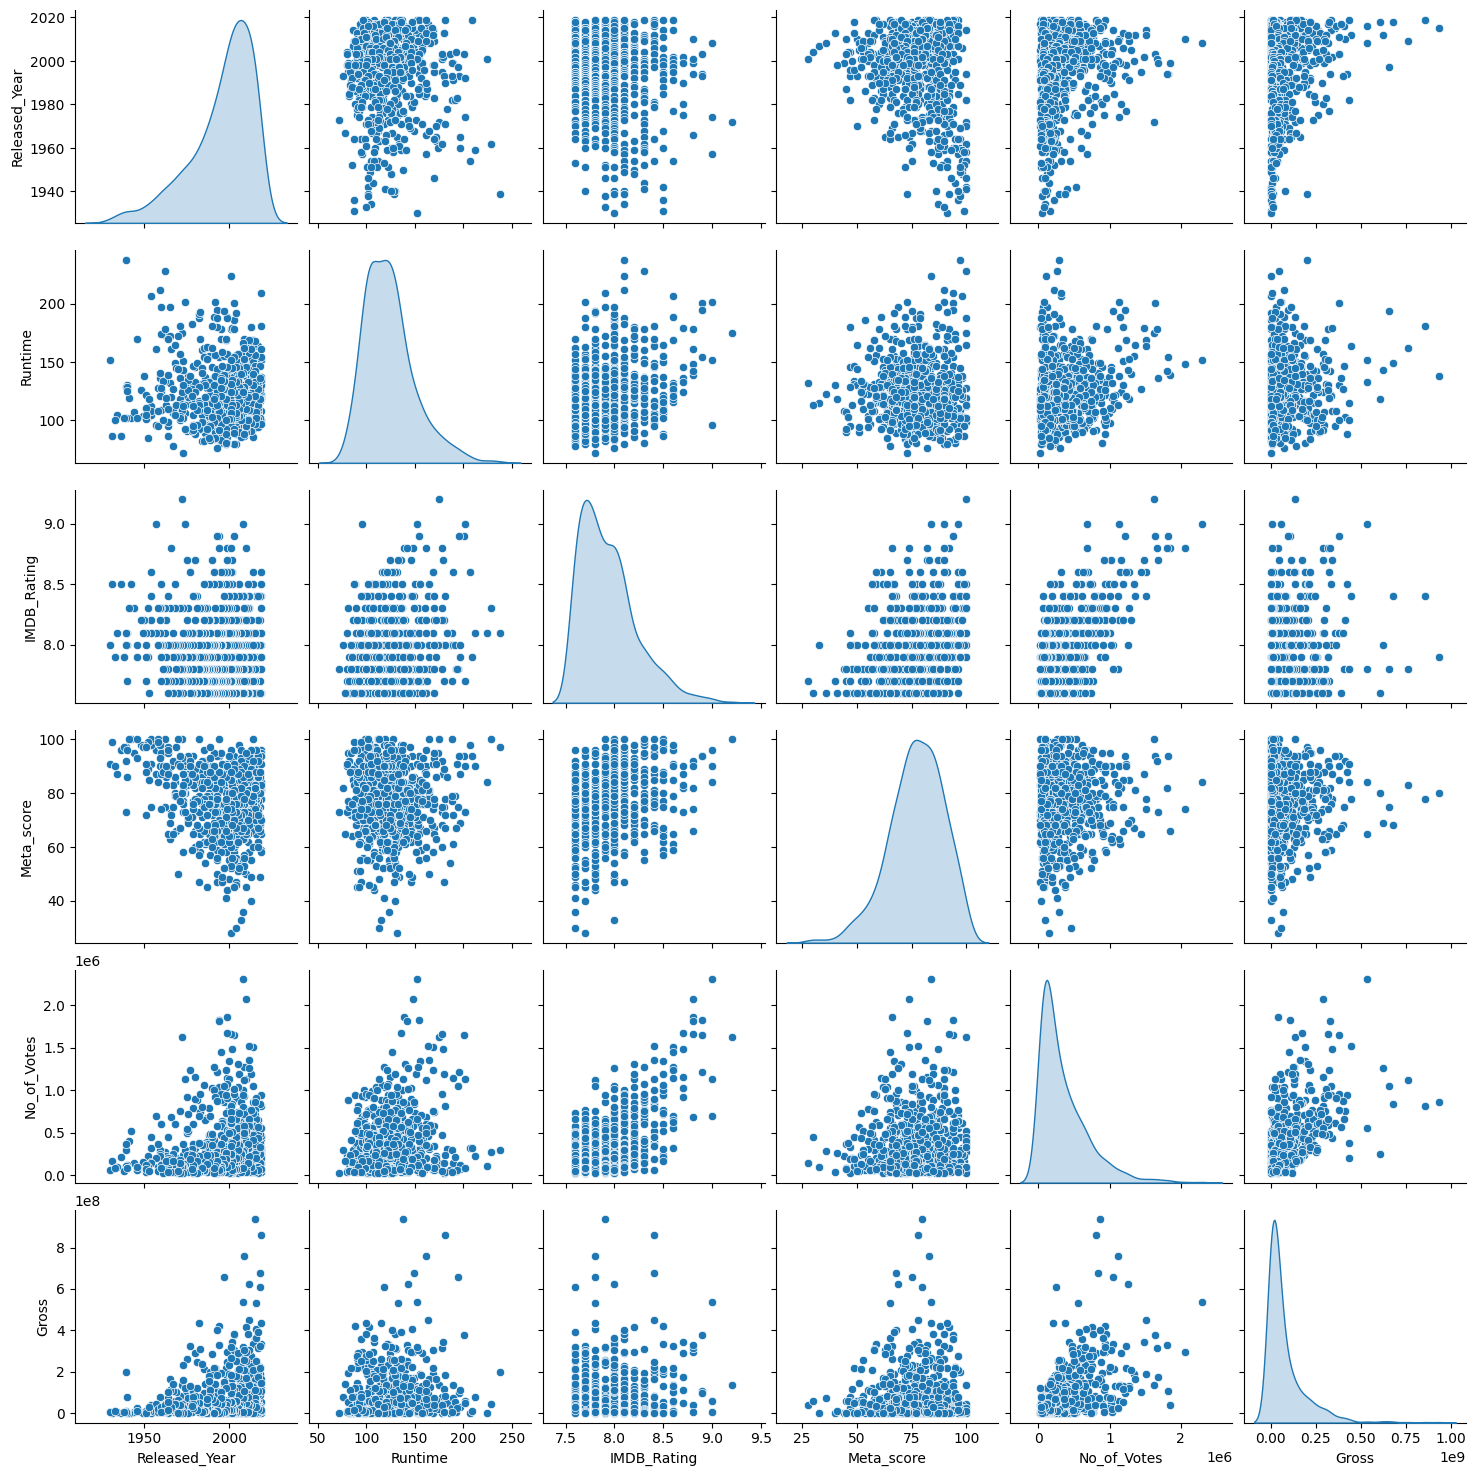

In [ ]:
# Criação de gráficos scatter dos atributos quantitativos
sns.pairplot(df[colunas_quantitativas], kind='scatter', diag_kind='kde')
plt.savefig('../resultados/Dispersão.png')
plt.show()

## 4. Gráfico de barras de gêneros mais frequentes

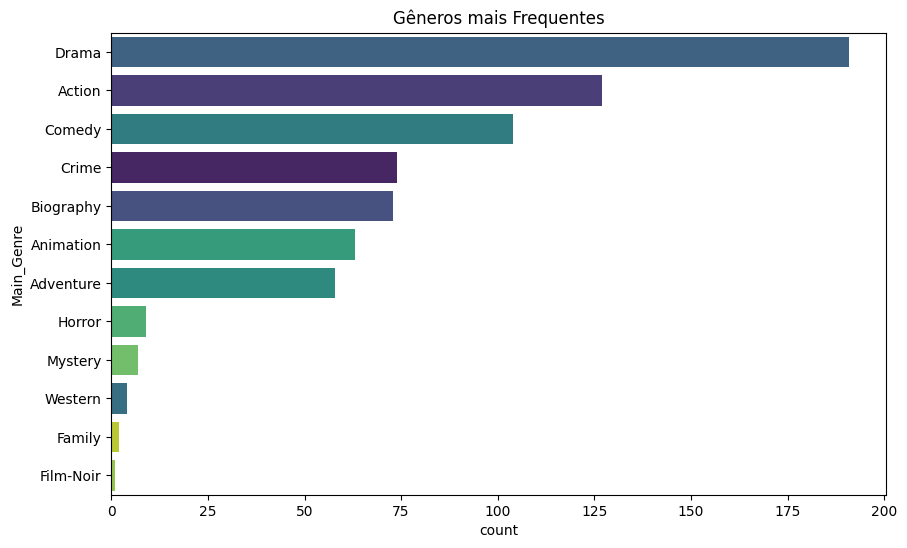

In [196]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Main_Genre', hue='Main_Genre', order=df['Main_Genre'].value_counts().index, palette='viridis', legend=False)
plt.savefig('../resultados/frequencia_barras_genero.png')
plt.title('Gêneros mais Frequentes')
plt.show()

## 5. Gráfico de barras de certificados(classificação etária) mais frequentes

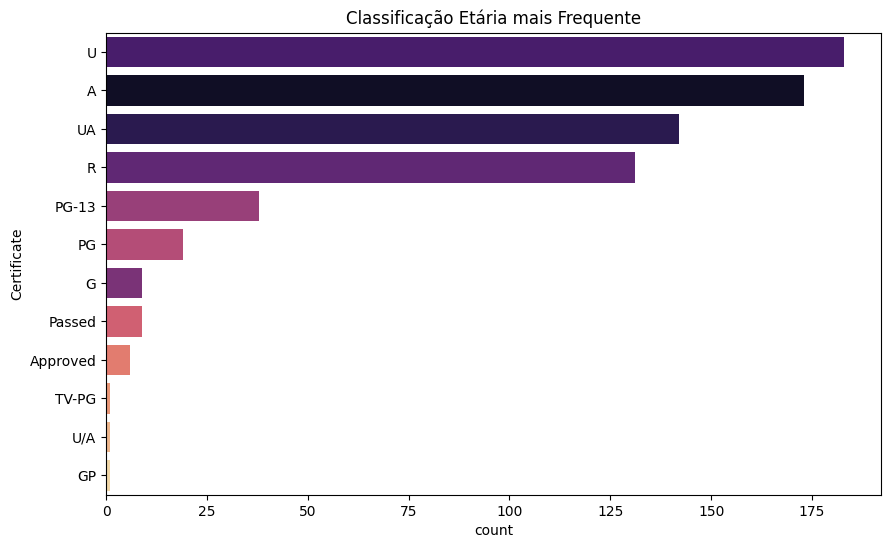

In [195]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Certificate', hue='Certificate', order=df['Certificate'].value_counts().index, palette='magma', legend=False)
plt.savefig('../resultados/frequencia_barras_classificacao_etaria.png')
plt.title('Classificação Etária mais Frequente')
plt.show()


## 6. Gráfico de barras de diretores mais frequentes

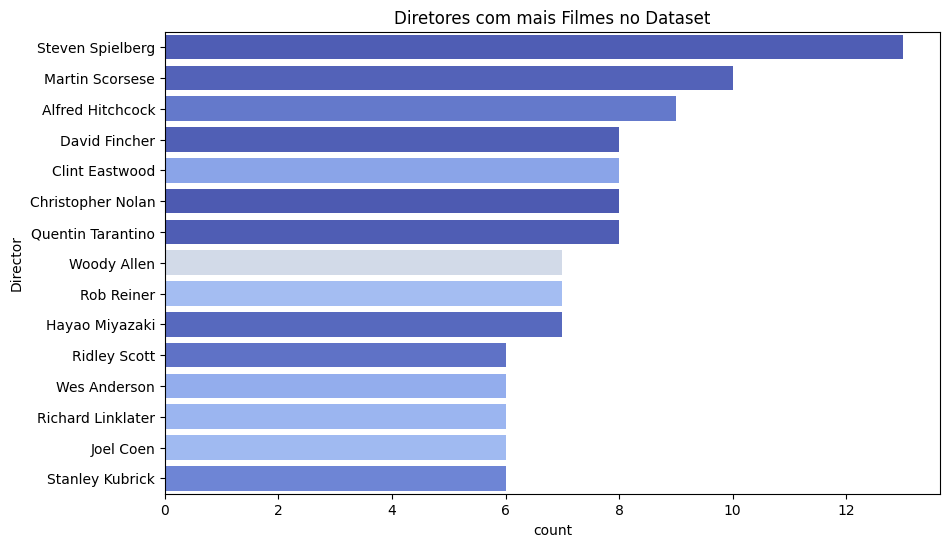

In [197]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Director', hue='Director', order=df['Director'].value_counts().index[:15], palette='coolwarm', legend=False)
plt.savefig('../resultados/frequencia_barras_diretores.png')
plt.title('Diretores com mais Filmes no Dataset')
plt.show()

## 7. Gráficos de barras de atores mais frequentes

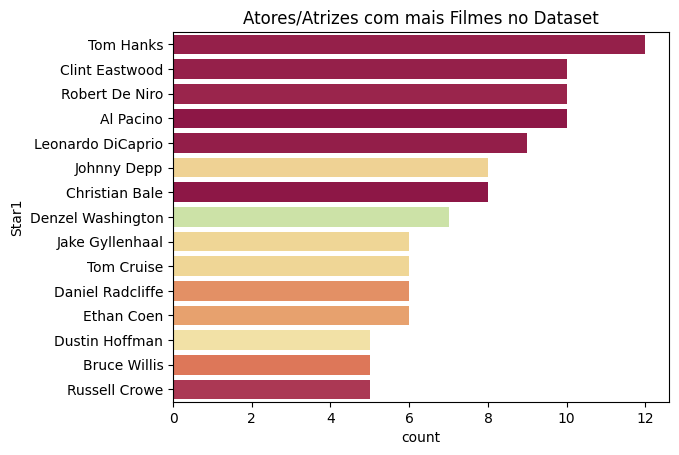

In [198]:
plt.Figure(figsize=(10,6))
sns.countplot(data=df, y='Star1', hue='Star1', order=df['Star1'].value_counts().index[:15], palette='Spectral', legend=False)
plt.savefig('../resultados/frequencia_barras_atores.png')
plt.title('Atores/Atrizes com mais Filmes no Dataset')
plt.show()


## 8. Gráfico de correlação entre Gross e Main_Genre

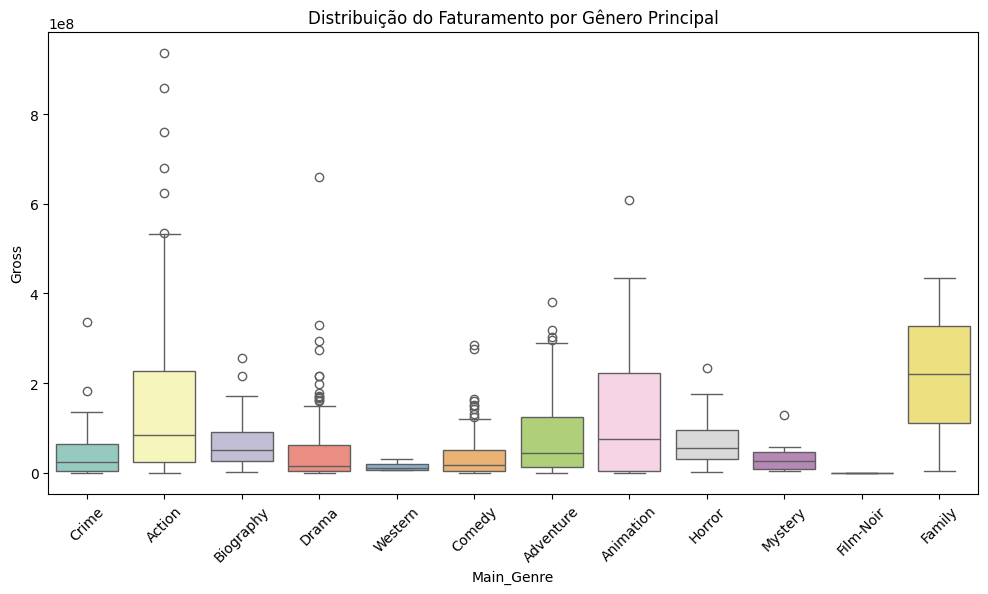

In [ ]:
#Gráfico de correlação entre Gross e Main_Genre
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Main_Genre', hue='Main_Genre', y='Gross', palette='Set3', legend=False)
plt.title('Distribuição do Faturamento por Gênero Principal')
plt.xticks(rotation=45)
plt.savefig('../resultados/correlacao_gross_genero.png')
plt.show()


### Hipóteses
Esse gráfico mostra a distribuição do faturamento (Gross) dos filmes em diferentes gêneros principais (Main_Genre). Gêneros como Action e Family tendem a ter um faturamento mais alto, enquanto gêneros como Western e Film-Noir apresentam um faturamento mais baixo.

## 9. Correlação entre variáveis quantitativas (numéricas)

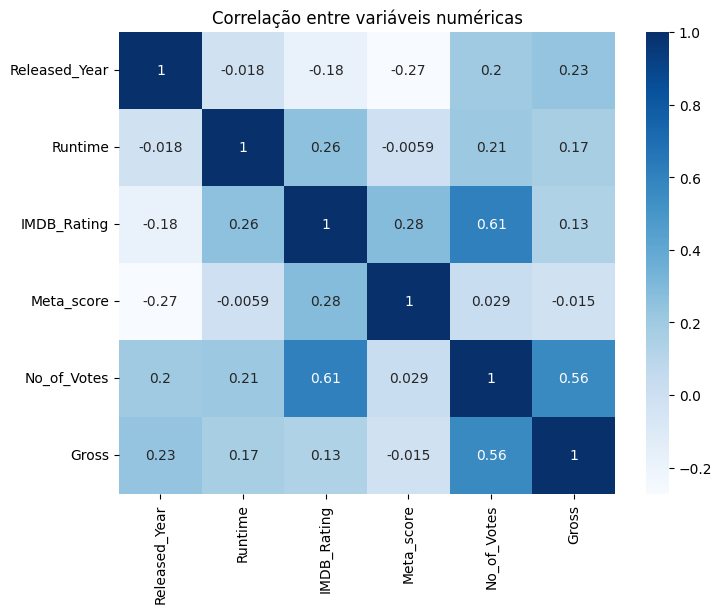

In [186]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlação entre variáveis numéricas')
plt.savefig('../resultados/correlacao_var_numericas.png')
plt.show()

#### **Hipótese**:
Filmes com mais votos tendem a ter maior faturamento (Gross) e notas mais altas no IMDB.

## 10. Relação entre faturamento e número de votos

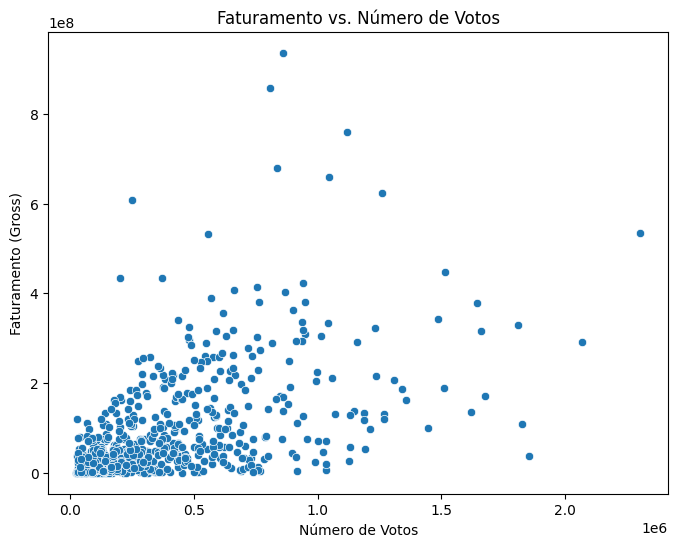

In [187]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='No_of_Votes', y='Gross', data=df)
plt.title('Faturamento vs. Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('Faturamento (Gross)')
plt.savefig('../resultados/relacao_gross_rating.png')
plt.show()

#### **Hipótese**:
Filmes que atraem maior engajamento público tendem a ter uma arrecadação maior.

## 11. Boxplot de notas por gênero principal

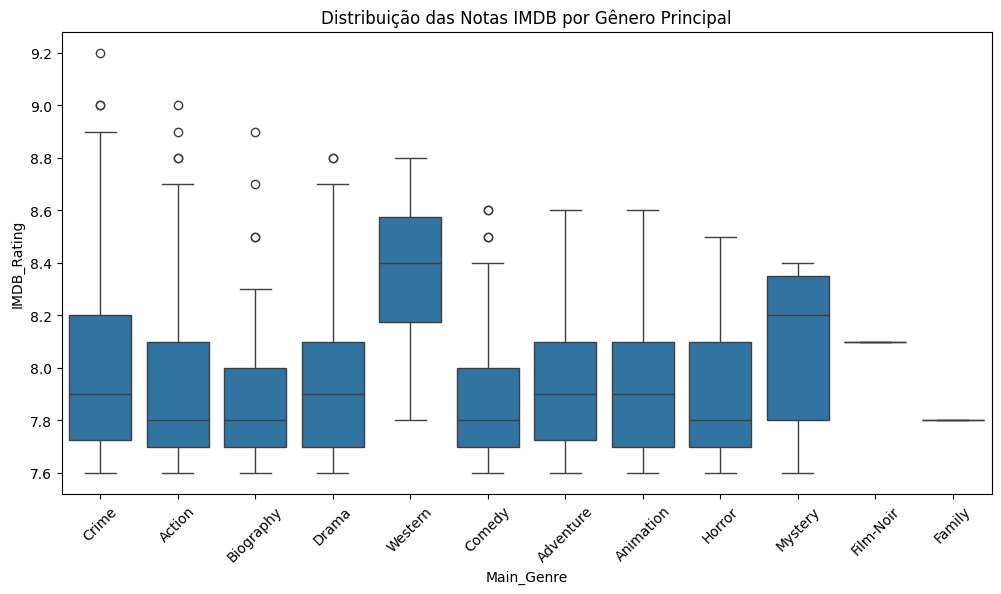

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Main_Genre', y='IMDB_Rating', data=df)
plt.title('Distribuição das Notas IMDB por Gênero Principal')
plt.xticks(rotation=45)
plt.savefig('../resultados/boxplot_rating_por_genero.png')
plt.show()


#### **Hipótese**:
A distribuição das notas do IMDB por gênero principal mostra que gêneros como Drama e Crime tendem a ter notas mais altas, enquanto gêneros como Comedy e Biography têm valores mais baixos. Isso demonstra que o gênero pode influenciar a recepção crítica dos filmes. Gosto é Gosto.

## Previsão do gênero a partir do Overview

In [189]:

#usando Main_Genre e Overview como exemplos
X = df['Overview'].astype(str)
y = df['Main_Genre']

vectorizer = TfidfVectorizer(max_features=500)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print("Acurácia na predição do gênero pelo overview:", clf.score(X_test, y_test))

Acurácia na predição do gênero pelo overview: 0.34265734265734266


#### **Hipótese**:

- É possível prever o gênero principal do filme a partir do texto do overview com acurácia "razoável" usando técnicas de processamento de linguagem natural.
Mas com o passar do tempo, mais especificamente no começo do século 2000 em diante, os filmes resolveram inovar misturando gêneros(Ex: Terror e Romance), dificultando o uso de processamento de linguagem natural para fazer a predição do gênero desses filmes, visto que os mesmos, possuem palavras-chaves que tornam a tarefa mais complexa, como o uso de palavras quase que opostas, como: 'love' e 'terror'.


# Previsão da nota do IMDB

Para prever a nota do IMDB (`IMDB_Rating`), estamos diante de um problema de **regressão**, pois a variável alvo é contínua.

**Variáveis e transformações:**
- **Variáveis numéricas:** `Released_Year`, `Runtime`, `Meta_score`, `No_of_Votes`, `Gross` (após conversão para numérico).
- **Variáveis categóricas:** `Certificate`, `Main_Genre`, `Director`, `Star1`, `Star2`, `Star3`, `Star4`. Estas podem ser transformadas em variáveis dummies (variáveis fictícias que assumem valor de 0 ou 1, permitindo que variáveis categóricas sejam incluídas em análises quantitativas) ou, no caso de alta cardinalidade (como diretores/atores), pode-se usar apenas os mais frequentes ou técnicas de target encoding.
- **Variáveis textuais:** `Overview` pode ser transformada em vetores numéricos usando técnicas como TF-IDF, caso queira incorporar informações do texto.

**Pré-processamento:**
- Tratar valores nulos.
- Converter colunas para tipos adequados.
- Normalizar/Padronizar variáveis numéricas se necessário.
- Codificar variáveis categóricas.

**Modelos:**
- **Regressão Linear:** Simples, interpretável, mas pode não capturar relações não-lineares.
- **Árvore de Decisão/Random Forest/Gradient Boosting:** Capturam relações não-lineares, lidam bem com variáveis categóricas e outliers, geralmente apresentam melhor desempenho para esse tipo de dado.
- **Redes Neurais:** Podem ser usadas, mas geralmente modelos de árvore têm melhor desempenho em dados com menos tuning.

**Prós e contras:**
- **Random Forest/Gradient Boosting:** 
    - Prós: Boa performance, robusto a outliers, lida bem com variáveis categóricas.
    - Contras: Menos interpretável, mais lento para grandes volumes de dados.
- **Regressão Linear:** 
    - Prós: Simples, interpretável.
    - Contras: Não captura relações complexas.

**Medida de performance:**
- **RMSE (Root Mean Squared Error):** Mede o erro médio quadrático, penalizando mais os grandes erros. É a métrica mais comum para regressão, pois mantém a unidade da variável alvo.
- **MAE (Mean Absolute Error):** Alternativa que penaliza menos outliers.

**Resumo:**  
O ideal é utilizar variáveis numéricas e categóricas relevantes, visto que é um problema de regressão(prever a nota do IMDB de um f ilme), transformando elas adequadamente se necessário. Modelos baseados em árvores (Random Forest ou Gradient Boosting) tendem a se ajustar melhor aos dados. A métrica/medida de performance escolhida será o RMSE, por ser padrão em regressão e penalizar mais erros grandes.

In [213]:
#Justificativa:

#Variáveis numéricas: Released_Year, Runtime, Meta_score, No_of_Votes, Gross (após conversão)
#Variáveis categóricas: Certificate, Main_Genre, Director, Star1. (mais frequentes afim de evitar alta cardinalidade)
#Variável textual: Overview (pode ser incluída via TF-IDF para melhorar o modelo)
#Modelo: RandomForestRegressor (lida bem com não-linearidades e variáveis categóricas)
#Métrica: RMSE (Root Mean Squared Error) padrão para regressão e penaliza mais grandes erros


features_num = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
features_cat = ['Certificate', 'Main_Genre', 'Director', 'Star1']

df_ml = df.copy()

#Preenchendo valores ausentes em variáveis numéricas com a mediana
for col in features_num:
    df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce')

#Para variáveis categóricas, manter apenas as mais frequentes (10 primeiras) e agrupar o resto como 'Other'
for col in ['Director', 'Star1']:
    top = df_ml[col].value_counts().nlargest(10).index
    df_ml[col] = df_ml[col].where(df_ml[col].isin(top), other='Other')

#Separação em X e Y
X = df_ml[features_num + features_cat]
y = df_ml['IMDB_Rating']

#Divisão de dados de treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Pipelines de pré-processamento
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, features_num),
    ('cat', cat_pipeline, features_cat)
])

#Finalização do Pipeline com modelo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=45))
])

#treinamento do modelo
model.fit(X_train, y_train)

#Avaliação com RMSE, métrica padrão para regressão, pois penaliza mais erros maiores.
y_pred = model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE na predição da nota IMDB: {rmse:.3f}')

RMSE na predição da nota IMDB: 0.193


# Predição para o exemplo fornecido "The Shawshank Redemption"

In [214]:
example = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
example_df = pd.DataFrame([example])
example_df['Released_Year'] = pd.to_numeric(example_df['Released_Year'], errors ='coerce').astype('Int64') #Transformando de string para int
example_df['Runtime'] = example_df['Runtime'].astype(str).str.replace(" min", "", regex=False).astype(float) #Removendo 'min' e convertendo para float como feito no dataset original mais acima
example_df['Gross'] = example_df['Gross'].astype(str).str.replace(",", "", regex=False).astype(float).astype('Int64') #Removendo vírgulas e convertendo para int como feito no dataset original mais acima
example_df['Main_Genre'] = example_df['Genre'].str.split(', ').str[0] #Criando a coluna Main_Genre como feito no dataset original mais acima
example_X = example_df[features_num + features_cat] #Selecionando apenas as features usadas no modelo
predicted_rating = model.predict(example_X)
print(f'Nota prevista para "The Shawshank Redemption": {predicted_rating[0]:.2f}')


Nota prevista para "The Shawshank Redemption": 8.84


## Respostas às perguntas do desafio

**1. Qual filme você recomendaria para uma pessoa que você não conhece?**  
Recomendaria o filme com maior nota IMDB e maior número de votos, pois tende a agradar a maioria. No dataset, esse filme é:  
- **The Godfather**
    - Você pode rodar a linha de código abaixo se desejar puxar diretamente do dataset

**2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**  
Os principais fatores são: número de votos, nota IMDB, gênero(ação e filmes familiares (faixa etária livre) tendem a faturar mais), presença de atores/diretores renomados e classificação etária mais ampla.

**3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**  
A coluna Overview permite identificar palavras-chave associadas a gêneros. O modelo de classificação treinado obteve uma acurácia de, aproximadamente, 35%, mostrando que é possível inferir o gênero com razoável precisão, mas há limitações devido a ambiguidade e sobreposição de gêneros, visto que filmes mais modernos tendem a misturar elementos de mais gêneros, tornando a tarefa mais dificil.

**4. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**  
O problema é de regressão. Foram usadas variáveis numéricas (ano, duração, meta_score, votos, faturamento) e categóricas (gênero, certificado, diretor, ator principal), transformadas via pipelines. O modelo RandomForestRegressor foi escolhido por lidar bem com não-linearidades e variáveis categóricas. A métrica escolhida foi RMSE, pois penaliza mais erros grandes e é uma métrica padrão em regressão.

**5. Qual seria a nota do IMDB para o exemplo fornecido?**  
A nota prevista para "The Shawshank Redemption" foi de 8.84.


In [192]:
df.sort_values(['IMDB_Rating', 'No_of_Votes'], ascending=[False, False]).iloc[0]['Series_Title']

'The Godfather'

In [193]:
import joblib
joblib.dump(model, '../Jupyter Notebook/regression_imdb.pkl')

['../Jupyter Notebook/regression_imdb.pkl']